In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr

In [48]:
DATA = 'data'
RESULTS_FOLDER = 'results/EDA'

In [49]:
# Load the dataset
data = pd.read_csv(f'{DATA}/QuestionnaireData.csv')

# Adding a column for ASD category based on AQ binary scores
def categorize_asd(score):
    if score >= 32:
        return 'Possible ASD'
    elif score >= 26:
        return 'Mild ASD'
    else:
        return 'Below Threshold'

# Ensure your column name for AQ binary score matches the name in your dataset
data['ASD_Category'] = data['AQ_binary'].apply(categorize_asd)

# Basic data summary
print(data.describe())

            subj         age    AQ_total   AQ_social   AQ_switch   AQ_detail  \
count  164.00000  164.000000  163.000000  163.000000  163.000000  163.000000   
mean    82.50000   22.030488  105.433274   18.978528   23.076687   24.211431   
std     47.48684    4.754622   16.175734    4.964799    3.941933    4.877769   
min      1.00000   18.000000   70.000000   11.000000   14.000000   11.000000   
25%     41.75000   19.000000   94.000000   16.000000   21.000000   21.000000   
50%     82.50000   21.000000  103.000000   18.000000   23.000000   24.000000   
75%    123.25000   23.000000  114.000000   21.000000   26.000000   27.000000   
max    164.00000   50.000000  163.000000   38.000000   35.000000   38.000000   

          AQ_comm     AQ_imag   AQ_binary   SRS_total   SRS_consc    SRS_comm  \
count  163.000000  163.000000  163.000000  160.000000  160.000000  160.000000   
mean    19.464175   19.702454   16.134969   41.659375   12.459375   12.825000   
std      5.085402    4.819469    7.1

In [50]:
print(data['ASD_Category'].value_counts())

ASD_Category
Below Threshold    149
Possible ASD         9
Mild ASD             6
Name: count, dtype: int64


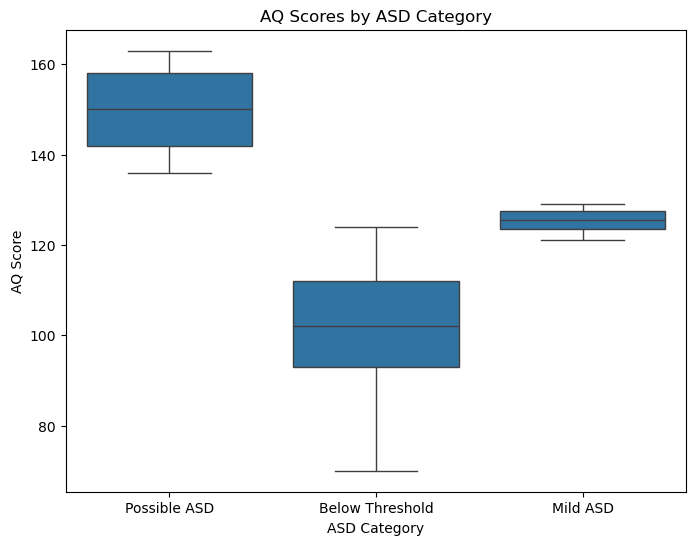

In [51]:
# Boxplot for comparing AQ scores between ASD categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='ASD_Category', y='AQ_total', data=data)
plt.title('AQ Scores by ASD Category')
plt.xlabel('ASD Category')
plt.ylabel('AQ Score')
plt.savefig(f"{RESULTS_FOLDER}/AQ_Scores_by_ASD_Category.png")
plt.show()

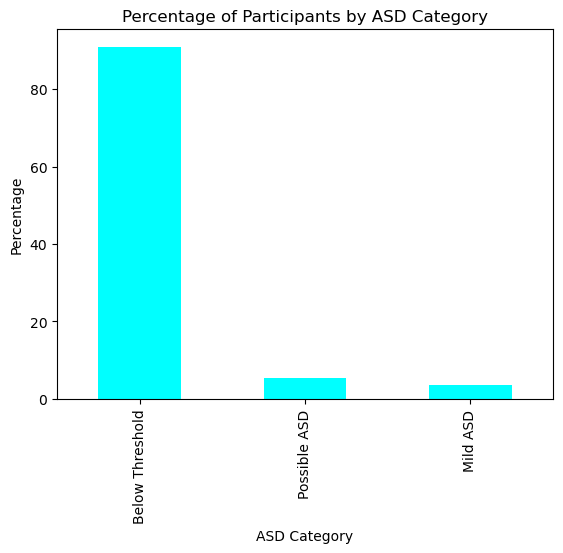

In [52]:
# Bar plot to visualize the percentage of participants in each ASD category
as_count = data['ASD_Category'].value_counts(normalize=True) * 100
as_count.plot(kind='bar', color='cyan')
plt.title('Percentage of Participants by ASD Category')
plt.xlabel('ASD Category')
plt.ylabel('Percentage')
plt.savefig(f'{RESULTS_FOLDER}/Percentage_of_Participants_by_ASD_Category.png')
plt.show()

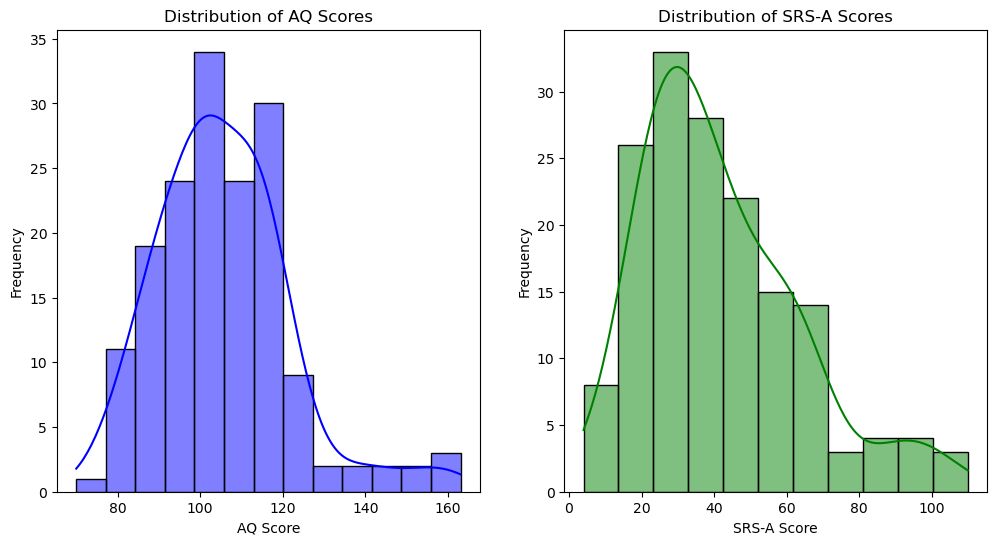

In [53]:
# Histograms of AQ and SRS-A scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['AQ_total'], kde=True, color='blue')
plt.title('Distribution of AQ Scores')
plt.xlabel('AQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['SRS_total'], kde=True, color='green')
plt.title('Distribution of SRS-A Scores')
plt.xlabel('SRS-A Score')
plt.ylabel('Frequency')

plt.savefig(f'{RESULTS_FOLDER}/Distribution_of_AQ_and_SRS-A_Scores.png')
plt.show()

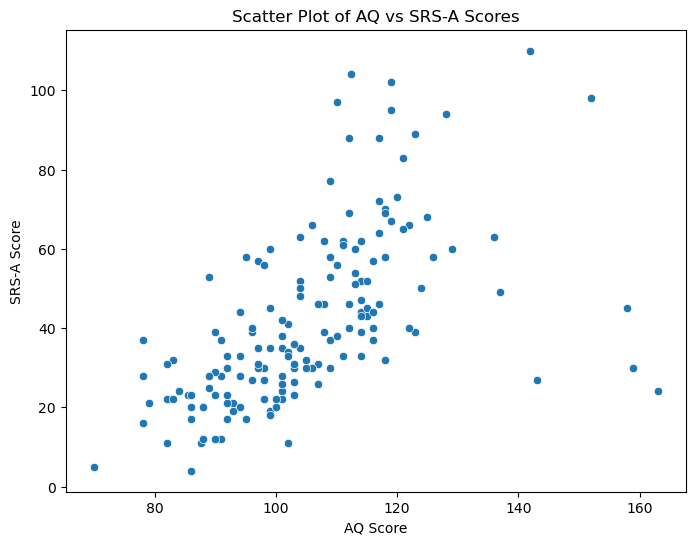

In [54]:
# Scatter plot to observe the relationship between AQ and SRS-A scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AQ_total', y='SRS_total', data=data)
plt.title('Scatter Plot of AQ vs SRS-A Scores')
plt.xlabel('AQ Score')
plt.ylabel('SRS-A Score')
plt.savefig(f'{RESULTS_FOLDER}/Scatter_Plot_of_AQ_vs_SRS-A_Scores.png')
plt.show()

In [55]:
# Computing Pearson's correlation coefficient
aq_srs_data = data[['AQ_total', 'SRS_total']]
aq_srs_data = aq_srs_data.dropna()
corr, p_value = pearsonr(aq_srs_data['AQ_total'], aq_srs_data['SRS_total'])
print(f"Pearson's correlation coefficient: {corr}, p-value: {p_value}")


Pearson's correlation coefficient: 0.5739695499552894, p-value: 2.5960764745219345e-15


In [56]:
# Function to calculate Cronbach's Alpha
def cronbach_alpha(df):
    items = df.shape[1]  # Number of items in the scale
    variance_sum = df.var(axis=0, ddof=1).sum()  # Sum of variances of all items
    total_var = df.sum(axis=1).var(ddof=1)  # Variance of total scores for all items
    alpha = (items / (items - 1)) * (1 - (variance_sum / total_var))
    return alpha

In [57]:
scale_columns = [
    "AQ_total",
    "AQ_social",
    "AQ_switch",
    "AQ_detail",
    "AQ_comm",
    "AQ_imag",
    "AQ_binary",
]

AQ_DATA = data[scale_columns]
AQ_DATA = AQ_DATA.dropna()

alpha = cronbach_alpha(AQ_DATA)
print(f"Cronbach's Alpha: {alpha}")

Cronbach's Alpha: 0.8418674880057374


In [58]:
scale_columns = ["SRS_total", "SRS_consc", "SRS_comm", "SRS_motiv", "SRS_rigid"]

SRS_DATA = data[scale_columns]
SRS_DATA = SRS_DATA.dropna()

alpha = cronbach_alpha(SRS_DATA)
print(f"Cronbach's Alpha: {alpha}")

Cronbach's Alpha: 0.8331439790461587
